In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape, Input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import matplotlib.pyplot as plt

In [2]:
IM_WIDTH = 224
IM_HEIGHT = 224

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
X_train = np.load('c://ai_project01/eye_blink_dataset/X_train.npy')

In [6]:
X_test = np.load('c://ai_project01/eye_blink_dataset/X_test.npy')

In [7]:
y_train = np.load('c://ai_project01/eye_blink_dataset/y_train.npy')

In [8]:
y_test = np.load('c://ai_project01/eye_blink_dataset/y_test.npy')

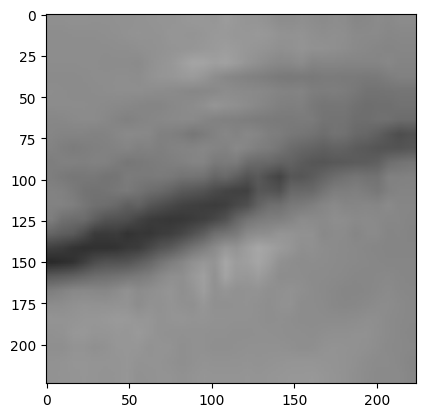

In [9]:
plt.imshow(X_train[0])

In [10]:
y_train[0]

array([0.], dtype=float32)

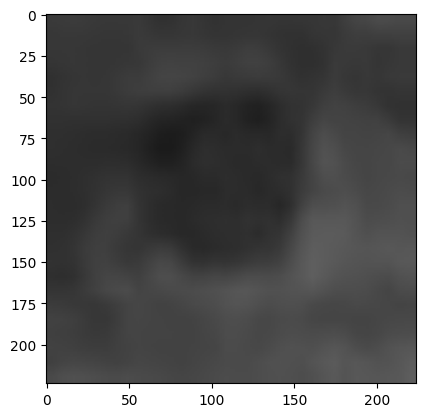

In [11]:
plt.imshow(X_test[0])

In [12]:
y_test[0]

array([1.], dtype=float32)

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range = 180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,

    brightness_range=[0.5,1.2],
    zoom_range=[0.8, 1.2]
)

In [14]:
train_generator = train_datagen.flow(
                                        x=X_train,
                                        y=y_train,
                                        batch_size=32,
                                        shuffle=True
)

In [15]:
test_datagen = ImageDataGenerator(
    rescale=1/255.0
)

In [17]:
test_generator = test_datagen.flow(
    x=X_test,
    y=y_test,
    batch_size=32,
    shuffle=False
)

In [19]:
conv_layers = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IM_HEIGHT, IM_WIDTH, 3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [20]:
model = Sequential()

In [21]:
model.add(conv_layers)

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(512, activation = "relu"))

In [24]:
model.add(Dropout(0.5))

In [25]:
model.add(Dense(256, activation="relu"))

In [26]:
model.add(Dropout(0.5))

In [27]:
model.add(Dense(128, activation="relu"))

In [28]:
model.add(Dropout(0.5))

In [29]:
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=Adam(lr=1e-5))

C:\ProgramData\anaconda3\envs\ai_project_env01\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [31]:
cb_checkpoint = ModelCheckpoint(filepath="c:/ai_project01/eye_blink_mpdel/",
                                monitor='val_acc',
                                save_best_only=True
                               )

In [32]:
earlystopping = EarlyStopping(monitor='val_loss',
                              patience=10,
                             )

In [33]:
model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    callbacks=[cb_checkpoint, earlystopping]
)

Epoch 1/100
81/81 [==============================] - ETA: 0s - loss: 0.7743 - acc: 0.5174

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 67s 456ms/step - loss: 0.7743 - acc: 0.5174 - val_loss: 0.6675 - val_acc: 0.7118
Epoch 2/100
81/81 [==============================] - ETA: 0s - loss: 0.6689 - acc: 0.6044

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 25s 307ms/step - loss: 0.6689 - acc: 0.6044 - val_loss: 0.5134 - val_acc: 0.7951
Epoch 3/100
81/81 [==============================] - ETA: 0s - loss: 0.5306 - acc: 0.7340

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 25s 310ms/step - loss: 0.5306 - acc: 0.7340 - val_loss: 0.2671 - val_acc: 0.9201
Epoch 4/100
81/81 [==============================] - ETA: 0s - loss: 0.3829 - acc: 0.8399

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 25s 310ms/step - loss: 0.3829 - acc: 0.8399 - val_loss: 0.2380 - val_acc: 0.9271
Epoch 5/100
81/81 [==============================] - ETA: 0s - loss: 0.2844 - acc: 0.8821

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 26s 313ms/step - loss: 0.2844 - acc: 0.8821 - val_loss: 0.0955 - val_acc: 0.9618
Epoch 6/100
81/81 [==============================] - ETA: 0s - loss: 0.2189 - acc: 0.9211

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 26s 314ms/step - loss: 0.2189 - acc: 0.9211 - val_loss: 0.0685 - val_acc: 0.9757
Epoch 7/100
81/81 [==============================] - ETA: 0s - loss: 0.1515 - acc: 0.9424

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 26s 313ms/step - loss: 0.1515 - acc: 0.9424 - val_loss: 0.0416 - val_acc: 0.9896
Epoch 8/100
81/81 [==============================] - ETA: 0s - loss: 0.1332 - acc: 0.9532

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 26s 315ms/step - loss: 0.1332 - acc: 0.9532 - val_loss: 0.0362 - val_acc: 0.9931
Epoch 9/100
81/81 [==============================] - 24s 291ms/step - loss: 0.1413 - acc: 0.9575 - val_loss: 0.0308 - val_acc: 0.9896
Epoch 10/100
81/81 [==============================] - 24s 292ms/step - loss: 0.1147 - acc: 0.9637 - val_loss: 0.0286 - val_acc: 0.9896
Epoch 11/100
81/81 [==============================] - 24s 292ms/step - loss: 0.0842 - acc: 0.9722 - val_loss: 0.0389 - val_acc: 0.9896
Epoch 12/100
81/81 [==============================] - 24s 292ms/step - loss: 0.0845 - acc: 0.9745 - val_loss: 0.0387 - val_acc: 0.9861
Epoch 13/100
81/81 [==============================] - 24s 293ms/step - loss: 0.0897 - acc: 0.9741 - val_loss: 0.0361 - val_acc: 0.9931
Epoch 14/100
81/81 [==============================] - 24s 292ms/step - loss: 0.0655 - acc: 0.9857 - val_loss: 0.0490 - val_acc: 0.9861
Epoch 15/100
81/81 [==============================] - 24s 292ms/step 

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 27s 335ms/step - loss: 0.0452 - acc: 0.9884 - val_loss: 0.0124 - val_acc: 0.9965
Epoch 29/100
81/81 [==============================] - 25s 304ms/step - loss: 0.0505 - acc: 0.9876 - val_loss: 0.0494 - val_acc: 0.9826
Epoch 30/100
81/81 [==============================] - 25s 309ms/step - loss: 0.0630 - acc: 0.9834 - val_loss: 0.0260 - val_acc: 0.9896
Epoch 31/100
81/81 [==============================] - 24s 300ms/step - loss: 0.0405 - acc: 0.9857 - val_loss: 0.0119 - val_acc: 0.9931
Epoch 32/100
81/81 [==============================] - 24s 291ms/step - loss: 0.0311 - acc: 0.9915 - val_loss: 0.0101 - val_acc: 0.9965
Epoch 33/100
81/81 [==============================] - 24s 291ms/step - loss: 0.0223 - acc: 0.9934 - val_loss: 0.0215 - val_acc: 0.9965
Epoch 34/100
81/81 [==============================] - 24s 291ms/step - loss: 0.0429 - acc: 0.9865 - val_loss: 0.0403 - val_acc: 0.9861
Epoch 35/100
81/81 [==============================] - 24s 291ms/step

INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


INFO:tensorflow:Assets written to: c:/ai_project01/eye_blink_mpdel\assets


81/81 [==============================] - 26s 318ms/step - loss: 0.0239 - acc: 0.9946 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 44/100
81/81 [==============================] - 24s 290ms/step - loss: 0.0405 - acc: 0.9896 - val_loss: 0.0191 - val_acc: 0.9931
Epoch 45/100
81/81 [==============================] - 24s 291ms/step - loss: 0.0293 - acc: 0.9911 - val_loss: 0.0163 - val_acc: 0.9896
Epoch 46/100
81/81 [==============================] - 24s 291ms/step - loss: 0.0315 - acc: 0.9923 - val_loss: 0.0179 - val_acc: 0.9931
Epoch 47/100
81/81 [==============================] - 24s 291ms/step - loss: 0.0324 - acc: 0.9907 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 48/100
81/81 [==============================] - 24s 291ms/step - loss: 0.0280 - acc: 0.9907 - val_loss: 0.0653 - val_acc: 0.9861
Epoch 49/100
81/81 [==============================] - 24s 291ms/step - loss: 0.0290 - acc: 0.9911 - val_loss: 0.0088 - val_acc: 0.9965
Epoch 50/100
81/81 [==============================] - 24s 291ms/step